# (Prosper Loan Data)
## by (John Beniamin Kostandy Shenoda)

## Preliminary Wrangling

> A dataset that contains information about loans, its composed of information about the loan amoint, the borrower categeory, the loan period and so on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
selected_col= ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'MonthlyLoanPayment','Investors', 'Occupation', 'CreditGrade','EmploymentStatusDuration','LoanStatus','BorrowerRate']
dfa = df[selected_col]

In [6]:
dfa.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,MonthlyLoanPayment,Investors,Occupation,CreditGrade,EmploymentStatusDuration,LoanStatus,BorrowerRate
0,9425,0.16516,3083.333333,36,NaN,Self-employed,330.43,258,Other,C,2.0,Completed,0.1580
1,10000,0.12016,6125.000000,36,A,Employed,318.93,1,Professional,NaN,44.0,Current,0.0920
2,3001,0.28269,2083.333333,36,NaN,Not available,123.32,41,Other,HR,NaN,Completed,0.2750
3,10000,0.12528,2875.000000,36,A,Employed,321.45,158,Skilled Labor,NaN,113.0,Current,0.0974
4,15000,0.24614,9583.333333,36,D,Employed,563.97,20,Executive,NaN,44.0,Current,0.2085


In [7]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   LoanOriginalAmount        113937 non-null  int64  
 1   BorrowerAPR               113912 non-null  float64
 2   StatedMonthlyIncome       113937 non-null  float64
 3   Term                      113937 non-null  int64  
 4   ProsperRating (Alpha)     84853 non-null   object 
 5   EmploymentStatus          111682 non-null  object 
 6   MonthlyLoanPayment        113937 non-null  float64
 7   Investors                 113937 non-null  int64  
 8   Occupation                110349 non-null  object 
 9   CreditGrade               28953 non-null   object 
 10  EmploymentStatusDuration  106312 non-null  float64
 11  LoanStatus                113937 non-null  object 
 12  BorrowerRate              113937 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory us

### What is the structure of your dataset?

> dataset is composed of 81 columns with 11397 notices in the rows( not all columns with the same number of notices, but i ll investigate only 10 features (columns) witch are the most important

### What is/are the main feature(s) of interest in your dataset?

> the main features are the amount of money borrowed, the period and categeorising the borrower

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> stated monthly income, loan original amount, 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

##### we will start with investigating some variables like loan original amount, monthly income, employment status

In [8]:
#global color coding
default_color = sb.color_palette()[0]

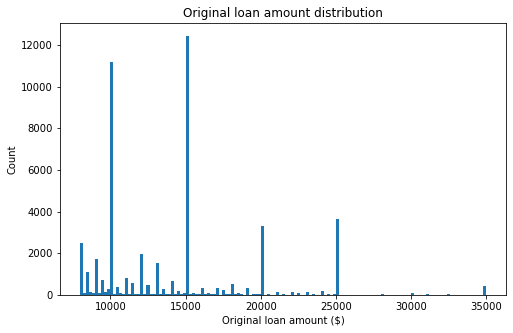

In [9]:
bins = np.arange(8000, dfa.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = dfa, x = 'LoanOriginalAmount', bins = bins);
plt.title('Original loan amount distribution')
plt.ylabel('Count')
plt.xlabel('Original loan amount ($)');

##### we can notice that the largest spikes are at 10, 15, 20, 25 ks, while the smaller spikes noticed at 7, 9, 13 ks

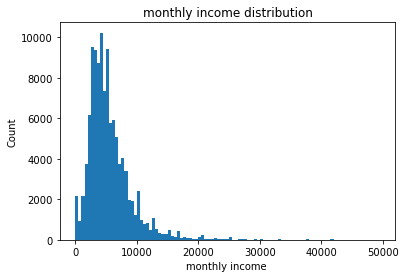

In [10]:
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = dfa, x = 'StatedMonthlyIncome', bins=bins_smi);
plt.title('monthly income distribution')
plt.ylabel('Count')
plt.xlabel('monthly income ');

##### we can notice that monthly income distribution is right skewed

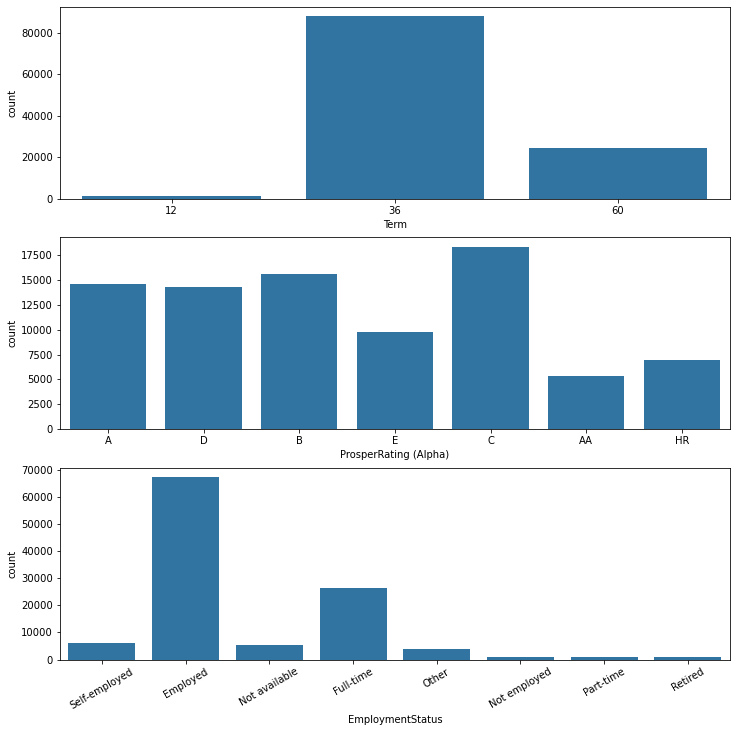

In [11]:
fig, ax = plt.subplots(nrows=3, figsize = [12,12])
sb.countplot(data = dfa, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = dfa, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = dfa, x = 'EmploymentStatus', color = default_color, ax = ax[2]);
plt.xticks(rotation=30);

##### we can notice that most of the loans are for a 36 months period, taken by fulltime jobs holder, with a ratind (a,b,c,d)

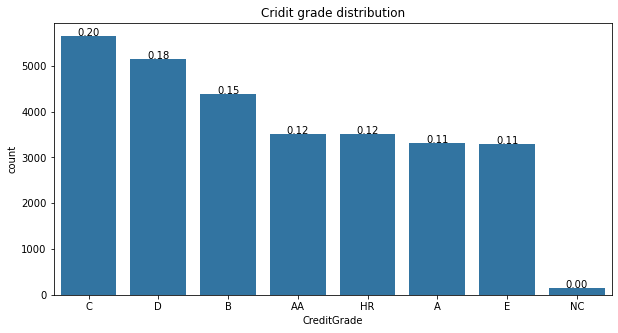

In [12]:

total_credit = dfa.CreditGrade.notnull().sum()
order_credit = dfa.CreditGrade.value_counts().index.tolist()
fig = plt.figure(figsize = (10,5))
ax_credit = sb.countplot(data = dfa, x = 'CreditGrade', color = default_color, order = order_credit)

for cg in ax_credit.patches:
    height = cg.get_height()
    ax_credit.text(cg.get_x()+cg.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total_credit),
            ha="center") 
plt.title('Cridit grade distribution')
plt.show();

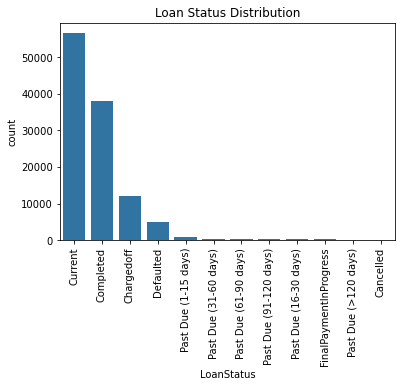

In [13]:
# loan status distribution
order_status = dfa.LoanStatus.value_counts().index.tolist()
ax = sb.countplot(data = dfa, x = 'LoanStatus', color = default_color, order = order_status)
plt.xticks(rotation=90)
plt.title('Loan Status Distribution')
 
plt.show();

##### we can notice that the most amount of lians are current, which cal=n lead us to further invedstigations

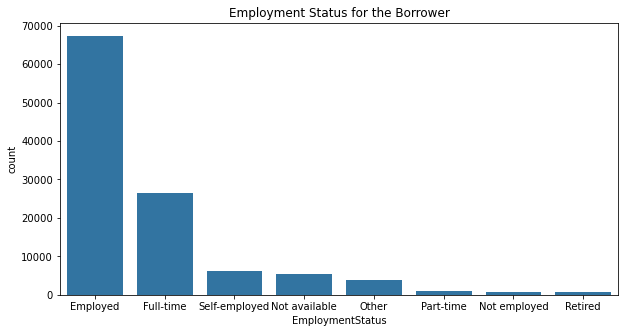

In [14]:
order_employment = dfa.EmploymentStatus.value_counts().index.tolist()
fig = plt.figure(figsize = (10,5))
plt.title('Employment Status for the Borrower')
sb.countplot(data = dfa, x = 'EmploymentStatus',  color = default_color,order = order_employment);

Text(0, 0.5, 'count')

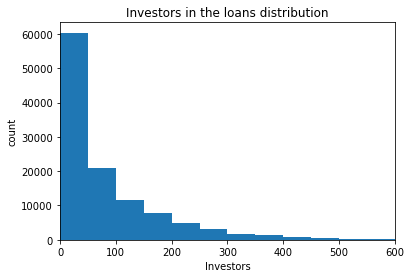

In [15]:
bins =  np.arange(0, df['Investors'].max()+50, 50)
plt.title('Investors in the loans distribution')
plt.hist(data =df, x='Investors', bins=bins)
plt.xlim((0,600));
plt.xlabel('Investors')
plt.ylabel('count')


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> there is no unusual, its logic that loan increases as the investors increased and as the customer is employed!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>no there is no need for more operations !

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [16]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','Investors', 'Term']
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus', 'CreditGrade']

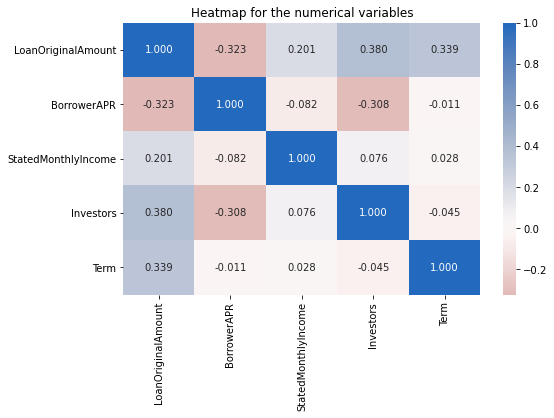

In [17]:
plt.figure(figsize = [8, 5])
sb.heatmap(dfa[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Heatmap for the numerical variables');

##### we can notice some strong corelations between investors & loan amount, term& loan amount. this may need further invistigation

In [ ]:
samples = np.random.choice(dfa.shape[0], 5000, replace = False)
loan_samp = dfa.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.title('matrix relations between numerical variables')

Text(0.5, 1.0, 'matrix relations between numerical variables')

##### we can record some notices here, a -ve relationship between investors and borrower apr & monthly income


In [ ]:
# we will highlight the relation between numerical and categorial
samples = np.random.choice(dfa.shape[0], 5000, replace = False)
loans_samp = dfa.loc[samples,:]

def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loans_samp, y_vars = num_vars, x_vars = cat_vars,
                size = 3, aspect = 1.5,)
g.map(boxgrid)
plt.title('relation between numerical and categorial variables')
plt.xticks(rotation=90)
plt.show();

In [ ]:
plt.figure(figsize = [8, 10])
# subplot 1: Prosper rating relates to term
plt.subplot(3, 1, 1)
sb.countplot(data = dfa, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: employment status relates to. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = dfa, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = dfa, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Reds')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

plt.xticks(rotation=10);

##### the peak of the long term loans is in the rating c in case of emplyed person

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> the employed people as they have the most loans, the less term of loan they have!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I am astonished about the result that self employed people have less loan as the employed!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
#  APR and loan amount in the highlight of Term investigating
g=sb.FacetGrid(data=dfa, aspect=1, height=10, col='Term', col_wrap=2)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

##### we can notice more the -ve relation that we stated above

In [ ]:
#  how APR and loan amount relates?
g=sb.FacetGrid(data=dfa, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

##### the -ve relationship is more clearly appearing

In [ ]:

fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = dfa, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = dfa, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

##### the loan goes in a logterm as the income aand loan amount increase

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> we find that the relation ship between loan amount and oan term increases as the APR increases, which mean as the trust in the customer increase you can lend him more money for more time to pay!

### Were there any interesting or surprising interactions between features?

> data analytics is always interesting as you can read facts through numbers, !

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [ ]:
!jupyter nbconvert exploration_template - Copy.ipynb --to slides --no-input